# **US Mass Shootings 1966 - 2021 Exploratory Data Analysis**

# Introduction

Dataset: https://www.kaggle.com/datasets/zusmani/us-mass-shootings-last-50-years

**Introduction**

  Mass shooting is an attempted or succesful multiple homicide incident. The term mass shooting isn't uniformly defined but it changes depending on the nation, organization and context but no matter how you define it, US has more mass shootings than any other country. According to CNN$^{[1]}$, US had 1/3 of the global mass shottings between the years 1966-2012 -excluding gang killings, domestic violence, or terrorist acts sponsored by an organization— in which a shooter kills at least four victims. The Rockefeller Institute of Government$^{[2]}$ reports that 402 mass shootings have taken place in the US in the years 1966-2020. As the years pass by, the numbers keep growing at an alarming rate reaching a peak this year with 278 mass shootings so far in 2022 (as of 12/6) according to the Gun Violence Archive$^{[3]}$ (using broader definition), putting the U.S. on track for one of the deadliest years on record since the archive began tracking gun deaths.

In this Exploratory Data Analysis we will explore in depth the US mass shooting phenomenon and try to disect the possible relationship between various factors  using graphic visualization and statistical methods. We will attempt to derive answers for questions such as:

1.   What does a typical mass shooting look like?
1.   What are the factors that affect the number of victims of an attack?
2.   Is there any relationship between the location and the attacks?
3.   Can we find any underling pattern inside a variable or between more than one?
4.   What is the bigger picture of the US Mass Shooting phenomenon?



**About the Dataset**

The dataset used for this project was found on Kaggle$^{[4]}$ and it was collected by Zeeshan-ul-hassan Usmani. The data is in tabular form and it consists of 323 instances of mass shootings that happened between the years 1966-2017 and 21 columns with the details of each incident. For the collection of the dataset the definition of mass shooting is "4 or more people got killed or injured in an attack" according to the creator. However, we notice that some of the mass shootings in the dataset only have 3 victims in total. So for the sake of being in accordance with the dataset, the definition of a mass shooting for this project will be: an attack with 3 or more injured or killed.


  [1] https://edition.cnn.com/2015/08/27/health/u-s-most-mass-shootings/index.html

  [2] https://rockinst.org/gun-violence/mass-shooting-factsheet/

  [3] https://www.gunviolencearchive.org/

  [4] https://www.kaggle.com/datasets/zusmani/us-mass-shootings-last-50-years?select=Mass+Shootings+Dataset+Ver+5.csv

# Load Data and Basic Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure

path = 'dataset_path_here'
data = pd.read_csv(path, encoding='utf-8')

# A first glance at the data

In [3]:
data.head()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


In [4]:
data.shape

(323, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S#                    323 non-null    int64  
 1   Title                 323 non-null    object 
 2   Location              278 non-null    object 
 3   Date                  323 non-null    object 
 4   Incident Area         261 non-null    object 
 5   Open/Close Location   295 non-null    object 
 6   Target                318 non-null    object 
 7   Cause                 246 non-null    object 
 8   Summary               323 non-null    object 
 9   Fatalities            323 non-null    int64  
 10  Injured               323 non-null    int64  
 11  Total victims         323 non-null    int64  
 12  Policeman Killed      317 non-null    float64
 13  Age                   179 non-null    object 
 14  Employeed (Y/N)       67 non-null     float64
 15  Employed at           4

In [6]:
data.nunique()

S#                      323
Title                   322
Location                226
Date                    290
Incident Area           175
Open/Close Location       4
Target                   54
Cause                    16
Summary                 323
Fatalities               25
Injured                  28
Total victims            35
Policeman Killed          6
Age                      51
Employeed (Y/N)           2
Employed at              36
Mental Health Issues      5
Race                     17
Gender                    6
Latitude                260
Longitude               260
dtype: int64

As it seems, the dataset has 323 instances and 18 features. From the very first glance, a few things stand out. First of all, we have both categorical and numerical features. Some of the categorical variables have to many categories to be usefull. For example, "Incident Area" has 175 different categories and "Target" has 54. That might pose a problem if we're trying to gain insight on this variables. Finally, some features contain a lot of null values, with a few features having more null than not. Let's drop the columns that have mostly null values and also the "S#" column.

In [7]:
data.drop(['S#', 'Employeed (Y/N)', 'Employed at'], axis=1, inplace=True)

# Proccess and Simplify Categorical Data

First we'll simplify some column values by encoding them into broader categories or merging two or more together into one.

## Incident Area

Categorize **Incident Area** as Residence, Store School, Entertainment, Religion, Workplace, Public Space or Other

In [8]:
print(data["Incident Area"].unique())
print("\nTotal unique values: ", len(data["Incident Area"].unique()))

['Church' 'Wal-Mart' 'Remodeling Store'
 'Las Vegas Strip Concert outside Mandala Bay' 'UPS facility'
 'Weis grocery' 'manufacturer Fiamma Inc.' 'a nursing home'
 'a street in downtown' 'baggage claim area of the airport'
 'cosmetics section of a Macyâ€™s department store' nan 'at protest'
 'at nightclub' 'in street' 'crown' 'block party' 'in a park' 'Home'
 'along a highway ' 'at street corner' 'at party' 'at gas station'
 'south shore' 'restaurant' 'bus station' 'in home'
 'home in rural Alabama' 'drive-by in Wetumpka, Alabama'
 'outside nightclub' 'outside of an apartment complex in Trenton, NJ'
 'backyard of a house' 'drive-by on MLK boulevard in Lafayette'
 'apartment in Chelsea' 'outside the club' 'restaurant parking'
 'outside the house' 'workplace' 'interstate in Hazelwood'
 'hookah bar parking' 'outside gym' 'nightclub' 'strip club' 'gas station'
 'outside of liquor store' 'Christmas Party' 'conference room'
 'health clinic' 'Black Lives Matter encampment' 'private campsite'
 

In [9]:
data.loc[data["Incident Area"].str.contains("house|home|residence|apartment|cottage|cabin", case=False, na=False), "Incident Area"] = "Residence"
data.loc[data["Incident Area"].str.contains("mart|store|grocery|gym|mall|spa|salon", case=False, na=False), "Incident Area"] = "Store"
data.loc[data["Incident Area"].str.contains("school|elementary|university|college|campus|classroom|dormitory", case=False, na=False), "Incident Area"] = "School"
data.loc[data["Incident Area"].str.contains("bar|club|cafe|coffee|cinema|theater|casino|restaurant|pub|concert|festival", case=False, na=False), "Incident Area"] = "Entertainment"
data.loc[data["Incident Area"].str.contains("church|temple|mosque|monastery", case=False, na=False), "Incident Area"] = "Religion"
data.loc[data["Incident Area"].str.contains("work|facilities|office|company|firm|factory", case=False, na=False), "Incident Area"] = "Workplace"
data.loc[data["Incident Area"].str.contains("street|protest|park|highway|shore|drive|sidewalk|bridge", case=False, na=False), "Incident Area"] = "Public Space"

data.loc[~data["Incident Area"].isin(["Residence", "Store", "School", "Entertainment", "Religion", "Workplace", "Public Space"]), "Incident Area"] = "Other"


## Open/Close Location

Correct categories in **Open/Close Location** column

In [10]:
data["Open/Close Location"].unique()

array(['Close', 'Open', nan, 'Open+Close', 'Open+CLose'], dtype=object)

In [11]:
data.loc[(data['Open/Close Location'] == "Open+CLose") | (data['Open/Close Location'] == "Open+Close"), 'Open/Close Location'] = "Both"
data['Open/Close Location'] = data['Open/Close Location'].fillna("Unknown")

## Target

Categorize **Target** as Random, Family, Coworkers, Friends, Officials, School Members, Other

In [12]:
print(data["Target"].unique())
print("\nTotal unique values: ", len(data["Target"].unique()))

['random' 'coworkers' 'women' 'police' nan 'Family' 'uninvited guests'
 'birthday party bus' 'Trooper' 'party guests' 'neighbors' 'club members'
 'Policeman' 'Family/Neighbors' 'drug dealer' 'protestors' 'Students'
 'Ex-Wife' 'Coworkers' 'Ex-Girlfriend' 'Marines' 'Ex-girlfriend'
 'House Owner' 'Friends' 'Contestant' 'Ex-Girlfriend & Family'
 'Ex-Wife & Family' 'Ex-Girlfriend+random' 'Family+random' 'rapper+random'
 'TSA Officer' "partner's family" 'Girlfriend' "Coworker's Family"
 'Family+students' 'Ex-Coworkers' 'Sikhs' 'black men' 'Congresswoman'
 'Policeman+Council Member' 'Students+Teachers' 'school girls'
 'basketball players' 'Ex-GirlFriend' 'hunters' 'Teachers'
 'Students+Parents' 'prayer group' 'psychologist+psychiatrist' 'lawyers'
 'Social Workers' 'monks' 'Children' 'postmaster' 'welding shop employees']

Total unique values:  55


In [13]:
# The order of replacement isn't random but rather in descending order of 
# "significance". For example a lot of perpetrators kills their family before 
# shooting the school. This will be classified as "School"
data.loc[data["Target"].str.contains("random", case=False, na=False), "Target"] = "Random"
data.loc[data["Target"].str.contains("coworker", case=False, na=False), "Target"] = "Coworkers"
data.loc[data["Target"].str.contains("school|student|teacher", case=False, na=False), "Target"] = "School Members"
data.loc[data["Target"].str.contains("family|ex|girlfriend|partner|parent|sibling", case=False, na=False), "Target"] = "Family"
data.loc[data["Target"].str.contains("friend|guest", case=False, na=False), "Target"] = "Friends"
data.loc[data["Target"].str.contains("police|troop|marine|officer|congress|council", case=False, na=False), "Target"] = "Officials"

data.loc[~data["Target"].isin(["Random", "Coworkers", "School Members", "Family", "Friends", "Officials"]), "Target"] = "Other"

## Cause

Categorize **Cause** into Terrorism, Racism, Psychological, Domestic, Other

In [14]:
print(data["Cause"].unique())
print("\nTotal unique values: ", len(data["Cause"].unique()))

['unknown' nan 'terrorism' 'unemployement' 'racism' 'frustration'
 'domestic dispute' 'anger' 'psycho' 'revenge' 'domestic disputer'
 'suspension' 'religious radicalism' 'drunk' 'failing exams' 'breakup'
 'robbery']

Total unique values:  17


In [15]:
data.loc[data["Cause"].str.contains("terrorism|religious", case=False, na=False), "Cause"] = "Terrorism"
data.loc[data["Cause"].str.contains("racism", case=False, na=False), "Cause"] = "Racism"
data.loc[data["Cause"].str.contains("frustration|anger|psycho|revenge", case=False, na=False), "Cause"] = "Psychological"
data.loc[data["Cause"].str.contains("domestic", case=False, na=False), "Cause"] = "Domestic"

data.loc[~data["Cause"].isin(["Terrorism", "Racism", "Psychological", "Family", "Domestic"]), "Cause"] = "Other"

## Mental Health Issues

Correct **Mental Health Issues** column

In [16]:
data["Mental Health Issues"].unique()

array(['No', 'Unclear', 'Yes', 'Unknown', 'unknown'], dtype=object)

In [17]:
data.loc[(data['Mental Health Issues'] == "Unclear") | (data['Mental Health Issues'] == "unknown") |
         (data['Mental Health Issues'] == "Unknown"), 'Mental Health Issues'] = "Unknown"

## Race

Correct **Race** column to White, Black, Latino, Asian, Native, Other, Unkown

In [18]:
print(data["Race"].unique())
print("\nTotal unique values: ", len(data["Race"].unique()))

['White' 'Black' 'Asian' nan 'Latino' 'Other' 'Unknown'
 'Black American or African American'
 'White American or European American' 'Asian American' 'Some other race'
 'Two or more races' 'Black American or African American/Unknown'
 'White American or European American/Some other Race'
 'Native American or Alaska Native' 'white' 'black'
 'Asian American/Some other race']

Total unique values:  18


In [19]:
data.loc[data["Race"].str.contains("white|european", case=False, na=False), "Race"] = "White"
data.loc[data["Race"].str.contains("black|african", case=False, na=False), "Race"] = "Black"
data.loc[data["Race"].str.contains("asian", case=False, na=False), "Race"] = "Asian"
data.loc[data["Race"].str.contains("latin", case=False, na=False), "Race"] = "Latino"
data.loc[data["Race"].str.contains("native", case=False, na=False), "Race"] = "Native"
data.loc[data["Race"].str.contains("other", case=False, na=False), "Race"] = "Other"

data.loc[~data["Race"].isin(["White", "Black", "Asian", "Latino", "Native", "Other"]), "Race"] = "Uknown"

## Gender

Correct **Gender** column

In [20]:
data["Gender"].unique()

array(['M', 'Unknown', 'Male', 'M/F', 'Male/Female', 'Female'],
      dtype=object)

In [21]:
data['Gender'].replace(['M', 'M/F'], ['Male', 'Male/Female'], inplace=True)

## New number of unique values per column

In [22]:
data.nunique()

Title                   322
Location                226
Date                    290
Incident Area             8
Open/Close Location       4
Target                    7
Cause                     5
Summary                 323
Fatalities               25
Injured                  28
Total victims            35
Policeman Killed          6
Age                      51
Mental Health Issues      3
Race                      7
Gender                    4
Latitude                260
Longitude               260
dtype: int64

Another thing we notice is that "Title" has 322 unique values instead of 323. That might mean that there is a duplicate instance or just two instances with the same title. To find out, we will see if there are any shootings with same title and the same date.

In [23]:
dupl = data[data.duplicated(subset=['Title','Date'])]

if dupl.empty:
  print("No duplicate instances")
else:
  print("There are duplicate items:")
  print(dupl)

No duplicate instances


# Proccess and Simplify Numerical Data

## Reformat some columns

We now move on to the preprocessing of numerical data. 

First of all, the column "Age" is string because some incidents included more than one perpetrators and their ages. To make EDA easier, we will only keep one of these ages and convert the age column to numerical (float). We will also convert the column "Date" to datetime data type.

In [24]:
data['Age'].unique()

array(['26', '47', '37', '64', '38', '24', '45', '43', '39', '20', nan,
       '25', '29', '0', '42', '57', '21', '27', '22', '19', '34', '44',
       '23', '12', '40', '59', '33', '70', '15', '36', '19,32', '17',
       '41', '32', '19,22', '28', '52', '18', '14', '16', '48', '66',
       '13', '17,18', '13,11', '35', '55', '50', '31', '30', '15,16',
       '51'], dtype=object)

There is also at least one age value equal to 0. We will replace any zeros with NaN

In [25]:
data.loc[data['Age'].str.contains(',', na=False), 'Age'] = data['Age'].str.split(',', expand=True)[0]
data['Age'] = data['Age'].astype(float);

data = data.replace(0, np.nan)

In [26]:
data['Date'] = pd.to_datetime(data['Date'])  # YY/MM/DD format

# Feature Engineering

As it was mentioned before, some features in the dataset contain a lot of null values. We will try to fill in as many null values as possible to improve that aspect.

## Location

We notice that the column "Location" has 45 missing values. That is too many to ignore. As such, it is worth trying to derive information about the location from the columns "Latitude" and "Longitude" with the help of the geopy library.

In [27]:
print("Number of instances that location is missing but there are coordinates: ", len(data[(data['Location'].isna()) & (~data['Longitude'].isna())]))

Number of instances that location is missing but there are coordinates:  45


It seems that we can fill in every empty location using the coordinates columns!

In [28]:
from geopy.geocoders import Nominatim
from tqdm import tqdm

# Connect to API
geolocator = Nominatim(user_agent="geoapiExercises", timeout=None)

# Make list of coordinates from their respective columns
longitudes = data[(data['Location'].isna()) & (~data['Longitude'].isna())]['Longitude'].to_list()
latitudes = data[(data['Location'].isna()) & (~data['Latitude'].isna())]['Latitude'].to_list()

# Iterate through coordinates and get city and state
areas = []
for lat, long in tqdm(zip(latitudes, longitudes), total=len(latitudes)):
  location = geolocator.reverse(str(lat) + "," + str(long))
  address = location.raw['address']

  # Catch all different types of cities/towns/villages etc
  if 'city' in address:
    city = address.get('city', '')
  elif 'town' in address: 
    city = address.get('town', '')
  elif 'village' in address: 
    city = address.get('village', '')
  elif 'hamlet' in address:
    city = address.get('hamlet', '')
  elif 'borough' in address:
    city = address.get('hamlet', '')
  # if not a city/town etc get county name
  else:
    city = address.get('county', '')

  state = address.get('state', '')
  areas.append(', '.join([city, state]))

data.loc[(data['Location'].isna()) & (~data['Longitude'].isna()), "Location"] = areas

100%|██████████| 45/45 [00:22<00:00,  2.01it/s]


Now that we extracted the new info it's time to evaluate the results

In [29]:
data["Location"].isna().sum()

0

It looks that there aren't any null values anymore.

## Coordinates

We will also make an attempt to fill in missing values of longtitude and latitude columns using the info of the column Location and the help of geopy library

In [30]:
location = data[(data['Latitude'].isna()) | (data['Longitude'].isna())]['Location'].to_list()

latitudes = []
longitudes = []
for address in tqdm(location, total=len(location)):
  location = geolocator.geocode(address)
  latitudes.append(location.latitude)
  longitudes.append(location.longitude)

data.loc[(data['Latitude'].isna()) | (data['Longitude'].isna()), "Latitude"] = latitudes
data.loc[(data['Latitude'].isna()) | (data['Longitude'].isna()), "Longitude"] = longitudes

100%|██████████| 20/20 [00:10<00:00,  1.86it/s]


In [31]:
data['Latitude'].isna().sum()

0

There are no more null coordinate values

## Age

Let's see if we can fill any null age values. One idea is to check the summary of the incidences, that don't have the age of the perpetrator(s), and see if it contains strings that imply that the age can be in there. The words "age" and "years old" seem fitting for that.

In [32]:
data[data['Age'].isna()]

,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Mental Health Issues,Race,Gender,Latitude,Longitude
11,Baton Rouge police shooting,"Baton Rouge, LA",2016-07-17,Other,Open,Officials,Other,"Gavin Long, a former Marine who served in Iraq...",3.0,3.0,6,3.0,NaN,Yes,Black,Male,30.445960,-91.187380
14,"Ferguson, MO Drive by","Ferguson, Missouri",2016-04-29,Other,Open,Random,Other,A group of 15 to 20 people was gathered for a ...,NaN,4.0,4,NaN,NaN,Unknown,Uknown,Unknown,38.744217,-90.305391
15,"Forestville, Maryland Drive-by","District Heights, Maryland",2016-04-26,Public Space,Open,Other,Other,Shooter shot from his car at people standing o...,1.0,4.0,5,NaN,NaN,Unknown,Uknown,Unknown,38.845113,-76.874972
16,"Halifax County, VA","Halifax, Virginia",2016-04-24,Other,Open,Random,Other,Male shooter fired into crown when a deputy po...,NaN,6.0,6,NaN,NaN,Unknown,Black,Male,36.765971,-78.928344
17,Tire-Slashing revenge escalation,"Baltimore, Maryland",2016-04-21,Other,Open,Random,Psychological,Shooter was angry over fact that rival familie...,NaN,4.0,4,NaN,NaN,Unknown,Black,Male,39.290385,-76.612189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Case Western Reserve University,"Cleveland, Ohio",2003-05-09,School,Close,School Members,Terrorism,"On May 9, 2003, a graduate of the Case Western...",1.0,2.0,3,NaN,NaN,No,Asian,Male,41.476576,-81.680515
265,Walter Rossler Company,"Corpus Christi, Texas",1995-04-03,Workplace,Close,Coworkers,Psychological,"On April 3, 1995, a disgruntled former metallu...",6.0,NaN,5,NaN,NaN,No,Uknown,Male,27.739075,-97.430734
268,Massachusetts Abortion Clinic,"Brookline, Massachusetts",1994-12-30,Other,Close,Random,Terrorism,"On December 30, 1994 a man entered a Planned P...",2.0,5.0,7,NaN,NaN,Yes,White,Male,42.324274,-71.140800
289,Wat Promkunaram Buddhist Temple,"Phoenix, Arizona",1991-08-09,Religion,Close,Other,Other,"On the evening on August 9, 1991, two high sch...",9.0,NaN,9,NaN,NaN,No,Asian,Male,33.571459,-112.090485


In [33]:
# Select rows that age in NaN and that gender is not unknown. If gender is unknown, 
# that means that the perpetrator is unknown and the summary will not contain their age
summaries = data[(data['Age'].isna()) & (data['Gender'] != 'Unknown')]["Summary"].to_list()
idx = data.index[(data['Age'].isna()) & (data['Gender'] != 'Unknown')].to_list()

print(idx)

for i, summary in enumerate(summaries):
  if " age" in summary.lower() or "years old" in summary.lower() or "year old" in summary.lower() or "year-old" in summary.lower():
    print("Index:",idx[i], "\nSummary:",summary)
    print('-'*(len('summary: ')+len(summary)))

[11, 16, 17, 19, 20, 22, 25, 26, 27, 28, 29, 30, 31, 33, 36, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 62, 63, 67, 68, 69, 71, 72, 73, 75, 76, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 158, 160, 179, 190, 237, 265, 268, 289, 320]
Index: 58 
Summary: Law enforcement officers in northeastern Mississippi stormed a house Saturday after an hours-long standoff with a gunman holed up inside, leading to a shootout that left one officer dead and three others wounded.The standoff started Friday afternoon when authorities responded to a domestic dispute call at the home near Iuka. But the man, holed up in his home with his wife and 10-year-old daughter, refused to come out, 

The results are not as good as with Location but we managed however to find the age of two perpetrators that were not mentioned in the Age column (indices 67, 153). We will add those manually into the Age column.

In [34]:
data.iloc[67, 12] = 19
data.iloc[153, 12] = 26

The large number of missing values is definitely a problematic aspect of this dataset. Due to the large percentage of nulls of the variable imputation might be hard. Because of that it might be worth trying to find more age data about the incidents in the dataset.  

Some other features that would be usefull to be generated would be "Incident Area" and "Cause" but that doesn't seem possible with the simple methods we used above.

## States

Finally, we will create a new feature "States" to store the State each insident happened.

In [35]:
# Dictionary of State conversions
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "Washington D.C.": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [36]:
data.insert(2,'States',  data['Location'].str.rpartition(', ')[2].str.strip(' '))  # Create a new column with the States
data.replace({'States': us_state_to_abbrev}, inplace=True);

In [37]:
data['States'].unique()

array(['TX', 'CO', 'MD', 'NV', 'CA', 'PA', 'FL', 'OH', 'WA', 'LA', 'MO',
       'VA', 'IL', 'AL', 'NM', 'TN', 'NC', 'KY', 'GA', 'NJ', 'MI', 'KS',
       'MA', 'AZ', 'MS', 'NY', 'DE', 'NE', 'MN', 'ME', 'OR', 'SD', 'SC',
       'WI', 'MT', 'IN', 'OK', 'ID', 'WV', 'CT', 'AR', 'UT', 'VT', 'HI',
       'AK', 'WY', 'IA'], dtype=object)

# Analysis

## General

### Numerical Variables

**Descriptive Statistics**

In [38]:
data.describe()

,Fatalities,Injured,Total victims,Policeman Killed,Age,Latitude,Longitude
count,282.000000,268.000000,323.000000,19.000000,180.000000,323.000000,323.000000
mean,5.081560,7.444030,10.263158,2.157895,31.761111,37.135874,-94.501174
std,5.919124,32.679018,33.662309,1.384965,13.005097,5.526835,16.402386
min,1.000000,1.000000,3.000000,1.000000,12.000000,21.325512,-161.792752
25%,2.000000,2.000000,4.000000,1.000000,20.000000,33.544131,-109.103886
50%,4.000000,3.000000,5.000000,1.000000,30.500000,36.556058,-88.448459
75%,6.000000,6.000000,9.000000,3.000000,41.000000,41.476576,-81.703237
max,59.000000,527.000000,585.000000,5.000000,70.000000,60.790539,-69.707823


Let's comment on a few highlights of the descriptive metrics above. The mean number of victims is 10 however the median is 5 and we also have an abnormally large standard deviation. That along with the fact that the max value has a very big difference from the 75% percentile, signifies that there are some upper outliers in the number of victims. From the dispression of the total victims, using the Interquantile range, we can also derive that 50% of mass shooting have a total number of victims lying within the range [4,9] and that the majority of perpetrators age is in the range [20,41]. Another interesting thing that is observed by the mean and median of the variable "Policeman Killed", is that police officers are rarely victims of the attacks. We can also gain some insight into the deadliest attack that has max values for the variables Fatalities and Injured are 59 and 527 respectively (which we can suspect that is one of the outliers).

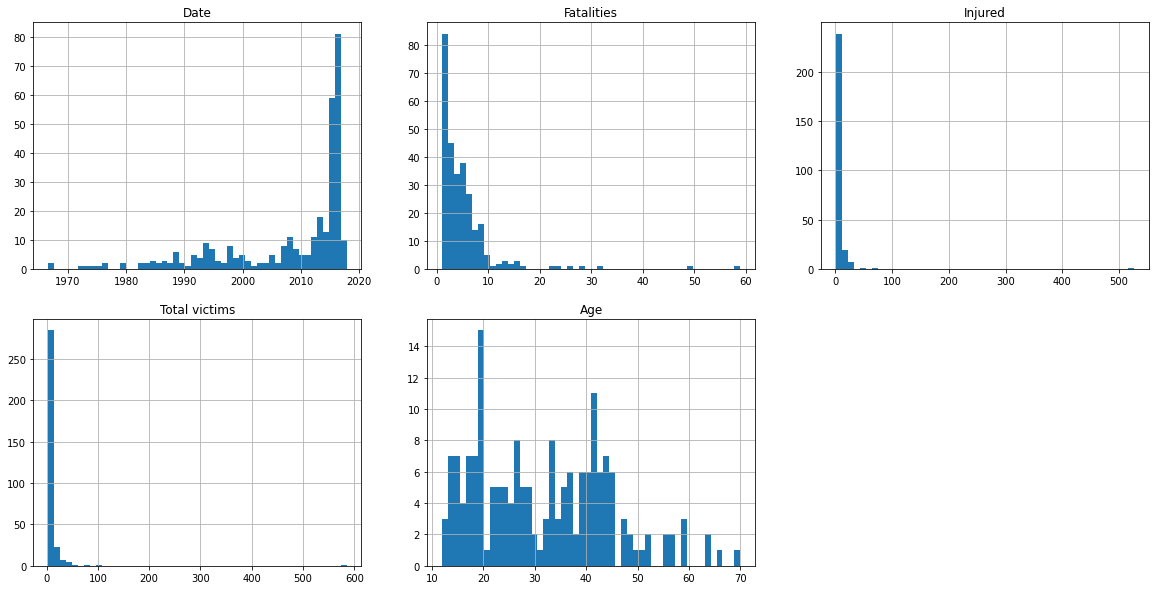

In [39]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2, 3, 1)
ax1.title.set_text('Date')
data['Date'].hist(bins=50);

ax2 = fig.add_subplot(2, 3, 2) 
ax2.title.set_text('Fatalities')
data['Fatalities'].hist(bins=50);

ax3 = fig.add_subplot(2, 3, 3)
ax3.title.set_text('Injured')
data['Injured'].hist(bins=50);

ax4 = fig.add_subplot(2, 3, 4)
ax4.title.set_text('Total victims')
data['Total victims'].hist(bins=50);

ax5 = fig.add_subplot(2, 3, 5) 
ax5.title.set_text('Age')
data['Age'].hist(bins=50);

In [40]:
from datetime import datetime as dt
import plotly.express as px

x = data['Date'].dt.year.unique()  # Year of incident

total_victims = data['Total victims'].groupby(data['Date'].dt.year).sum().iloc[::-1]
fatalities = data['Fatalities'].groupby(data['Date'].dt.year).sum().iloc[::-1]
injured = data['Injured'].groupby(data['Date'].dt.year).sum().iloc[::-1]

y = [total_victims, fatalities, injured]

fig = px.line(data, x=x, y=y)
fig.data[0].name = "Total"
fig.data[1].name = "Killed"
fig.data[2].name = "Injured"
fig.update_layout(title_text='Total Victims per Year', title_x=0.5, xaxis_title="Year", yaxis_title="Victims")
fig.show(renderer="colab")

A few significant observations from the graphs above are that the number of mass shootings increases with the years as does the number of victims. From the graphs, as well as from the descriptive statistics, it also becomes apparent that the variables "Fatalities", "Injured" and "Total victims" contain some outliers.

Let's plot the box plot to detect the outliers:

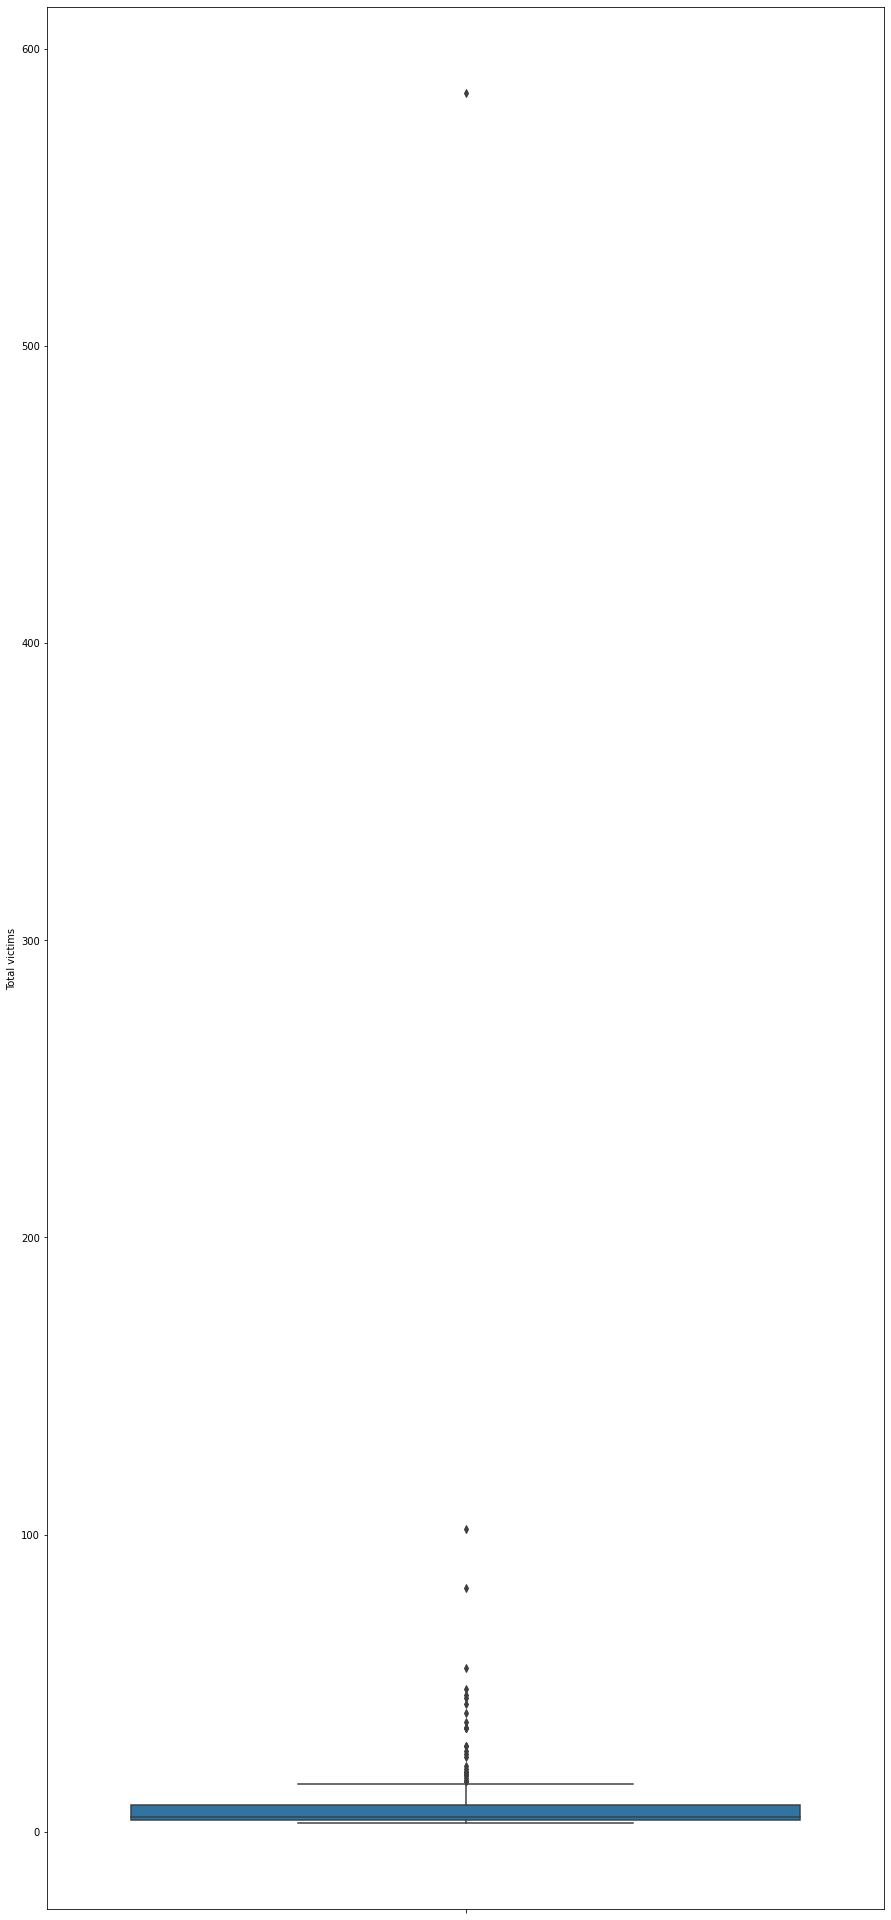

In [41]:
ax = plt.figure(figsize=(15,35))
ax = sns.boxplot(y="Total victims", data=data)

From the box plot above we notice that the dataset contains quite a few outliers, we have however one extreme outlier that is the most problematic in the dataset. The outlier has a value of 585 while the median is just 5. Since the dataset isn't very large -and especially since these are real values and not just errors- it would be best to avoid deleting the outliers but rather use Winsorizing/Imputation to deal with them during the Pre Processing phase. However, it might be worth it to remove the extreme outlier as it seems to be a very rare exeption even among outliers.

**Inferential Statistsics**

We can hypothesize that the variables "Total victims", "Injured" and "Fatalities" are linearly correlated. We will print Pearson correlation factor along with a heat map to see if we can confirm the hypothesis and to also check if there are any other linearly correlated variables.

In [42]:
corr = data.corr()

In [43]:
corr

,Fatalities,Injured,Total victims,Policeman Killed,Age,Latitude,Longitude
Fatalities,1.000000,0.634446,0.722179,-0.136048,0.162425,-0.088036,-0.067046
Injured,0.634446,1.000000,0.991276,-0.194291,0.171710,-0.039385,-0.101342
Total victims,0.722179,0.991276,1.000000,-0.181202,0.162050,-0.041660,-0.087785
Policeman Killed,-0.136048,-0.194291,-0.181202,1.000000,-0.522708,0.053816,0.011011
Age,0.162425,0.171710,0.162050,-0.522708,1.000000,-0.174595,0.076829
Latitude,-0.088036,-0.039385,-0.041660,0.053816,-0.174595,1.000000,-0.116320
Longitude,-0.067046,-0.101342,-0.087785,0.011011,0.076829,-0.116320,1.000000


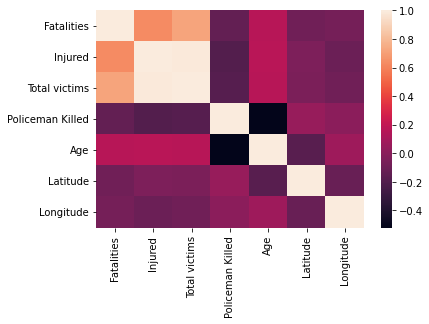

In [44]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Finally, from the correlation matrix and the heatmap, we see that there is a an almost total linear correlation between "Total victims" and "Injured" and a strong positive correlation between the 3. We also observe that the age variable has a weak positive linear correlation with the variables fatalities/injured/total victims, (meaning that the older the shooter is, the more fatal the attack) and a strong negative correlation with the variable Policeman Killed (meaning that policemen are less likely to be victims of attacks commited by younger perpetrators).

### Categorical Variables

**Descriptive Statistics**

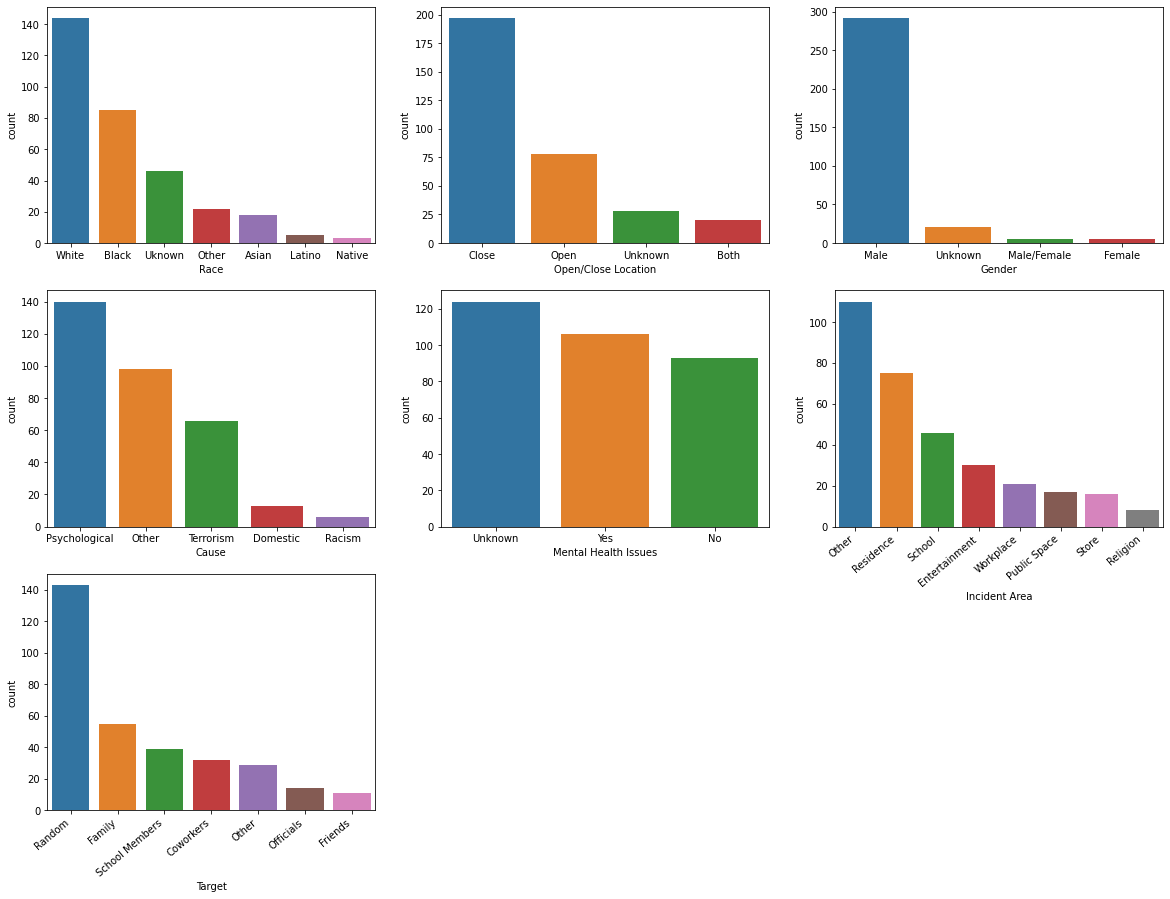

In [45]:
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(4, 3, 1)
sns.countplot(data=data, x='Race', ax=ax1, order=data['Race'].value_counts().index);

ax2 = fig.add_subplot(4, 3, 2) 
sns.countplot(data=data, x='Open/Close Location', ax=ax2, order=data['Open/Close Location'].value_counts().index);

ax3 = fig.add_subplot(4, 3, 3)
sns.countplot(data=data, x='Gender', ax=ax3, order=data['Gender'].value_counts().index);

ax4 = fig.add_subplot(4, 3, 4) 
sns.countplot(data=data, x='Cause', ax=ax4, order=data['Cause'].value_counts().index);

ax5 = fig.add_subplot(4, 3, 5) 
sns.countplot(data=data, x='Mental Health Issues', ax=ax5, order=data['Mental Health Issues'].value_counts().index);

ax6 = fig.add_subplot(4, 3, 6)
ax6.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(data=data, x='Incident Area', ax=ax6, order=data['Incident Area'].value_counts().index);

ax7 = fig.add_subplot(4, 3, 7) 
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=40, ha="right")
sns.countplot(data=data, x='Target', ax=ax7, order=data['Target'].value_counts().index);

In [46]:
data['Gender'].value_counts()

Male           292
Unknown         21
Male/Female      5
Female           5
Name: Gender, dtype: int64

From the plots above and the descriptive and inferential statistics of the numerical variables, we can see a few important patterns that help us adumbrate a typical mass shooting. Most are commited due to psychological reasons by white men of ages 20-41 and the target is more than twice as likely to be random people. The areas that a mass attack happens most frequently are closed locations and the two categories with the biggest absolute frequency are residences and schools. It is also worth mentioning that Men seem to make up the vast majority of the perpetrators with ratio $Women:Men \approx 1:58$.

**Inferential Statistics**

Let's see if there is any correlation between the total number of victims and the area, the race, the cause and the target, by performing a two way ANOVA test with significance level $a=0.05$.

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Rename some columns so that their names don't contain spaces to avoid errors in ols
data2 = data.rename(columns={'Total victims': 'Total_victims', 'Incident Area': 'Incident_Area', 'Open/Close Location': 'Open_Close_Location'})

model = ols(formula='Total_victims ~ C(Incident_Area) + C(Race) + C(Cause) + C(Open_Close_Location) + C(Target)', data=data2).fit()
sm.stats.anova_lm(model, typ=2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



,sum_sq,df,F,PR(>F)
C(Incident_Area),16064.491279,7.0,2.031321,0.051096
C(Race),8511.017955,6.0,1.255567,0.277964
C(Cause),2554.833702,4.0,0.565343,0.687993
C(Open_Close_Location),2658.345970,3.0,0.784332,0.503455
C(Target),1226.593351,6.0,0.180950,0.981925
Residual,334412.256876,296.0,NaN,NaN


From the results of the ANOVA test, the only variable correlated with the total number of victims is the incident area. More formally we define the hypothesis as:

\

$H_0: μ_{1} = μ_{2} = … = μ_{n}$, where n is the total groups of the variable 

$H_1: μ_{1} \neq μ_{2} \neq … \neq μ_{n}$

\

Since for all of the variables $p-value > a=0.05$ we fail to reject the null hypothesis for any of them at significance level $a=0.05$

Let's see if the same holds true for the relationship between "Fatalities" and area, race, cause and target. we define the hypothesis as before with the same significance level.

In [48]:
model = ols(formula='Fatalities ~ C(Incident_Area) + C(Race) + C(Cause) + C(Open_Close_Location) + C(Target)', data=data2).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Incident_Area),618.803357,7.0,2.729848,0.009516
C(Race),407.966833,6.0,2.099701,0.053760
C(Cause),135.443724,4.0,1.045641,0.384155
C(Open_Close_Location),40.661158,3.0,0.418545,0.739844
C(Target),88.416993,6.0,0.455060,0.841049
Residual,8257.646759,255.0,NaN,NaN


This time $p-value_{area} = 0.009 < 0.05$ and thus there is statistically significant evidence to reject the null hypothesis at 5% confidence level. We conclude that the area type is correlated with the number of Fatalities.

## Age

One feature that would be interesting to dive more into is the Age variable. What is the distribution of age? Is it correlated with the area of the incident or the cause? What about the targets of the attack? We will try to gain intuition around these questions mainly using graphs. First let's plot the distribution of the age and also see if there is any interesting relationship with Gender.

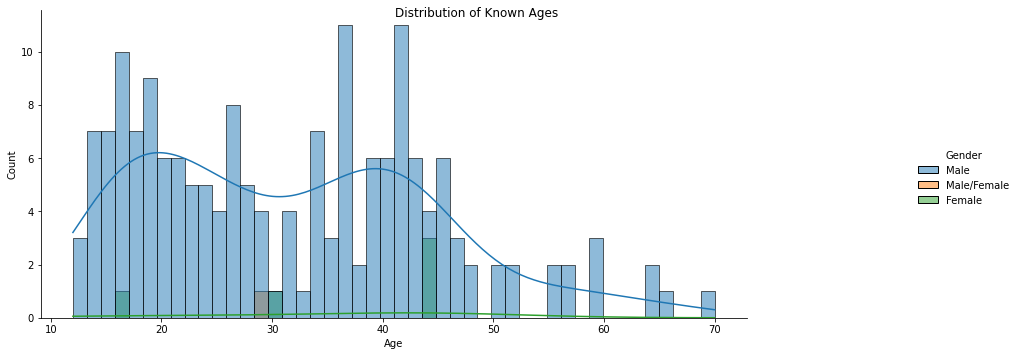

In [49]:
age_gender_dist = sns.displot(data=data, x='Age', bins=len(data['Age'].unique()), kde=True, hue=data[data['Gender'] != 'Unknown']['Gender']);  # Exclude 'Unknown' Gender from the graph
age_gender_dist.fig.suptitle('Distribution of Known Ages');
age_gender_dist.fig.set_size_inches(15,5)

In [50]:
print("Percentage of underage perpetrators:\n\n", len(data[data['Age'] <= 18])/len(data)*100,'%')

Percentage of underage perpetrators:

 10.8359133126935 %


Observing the monotonicity of the Kernel Density Estimate (KDE) we see that the number of shooters clearly drops at around 30 years old. If we denote with $\hat{f_{h}}(x)$ the KDE of the age $x$, where $X$ is a discrete random variable, then we can approximate its monotonicity as below:


\begin{array}{| c | c  c  c  c  c  c  c  c  c|}
 \hline
 x & 12 &   & 20 &   & 30  &   & 40  &  & 70\\ 
 \hline
 \hat{f_{h}}(x) &        &  \nearrow &    & \searrow    &   & \nearrow  &    & \searrow     \\
 \hline
\end{array}

Using the table above, we can see that in the dataset, the ages that are more prone to mass shooting lie in the ranges $[12, 20]∪[30,40]$

A logical hypothesis would be that the age of the shooter is a factor that affects the area, the cause and the targets of the attack. We will graph the most common groups of these variables to investigate.

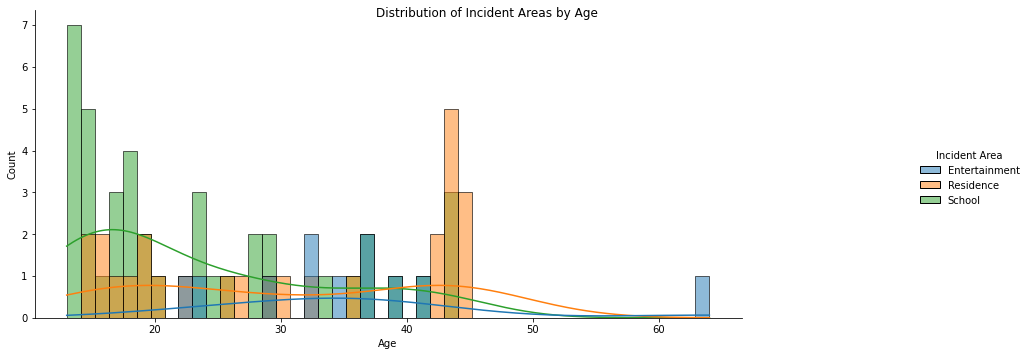

In [51]:
top_areas = data['Total victims'].groupby(data['Incident Area']).sum().sort_values(ascending=False).index.to_list()[1:4]

age_area_dist = sns.displot(data=data[data['Incident Area'].isin(top_areas)], x='Age', bins=len(data['Age'].unique()), kde=True, hue='Incident Area');
age_area_dist.fig.suptitle('Distribution of Incident Areas by Age');
age_area_dist.fig.set_size_inches(15,5)

As we expected, some of the Incident Areas are prefered by certain ages. From the KDEs it seems that school shootings are more common in teenagers and young adults, places of entertainment in ages 30-40 while residence roughly follows the age distribution and thus it is equally common in all ages.

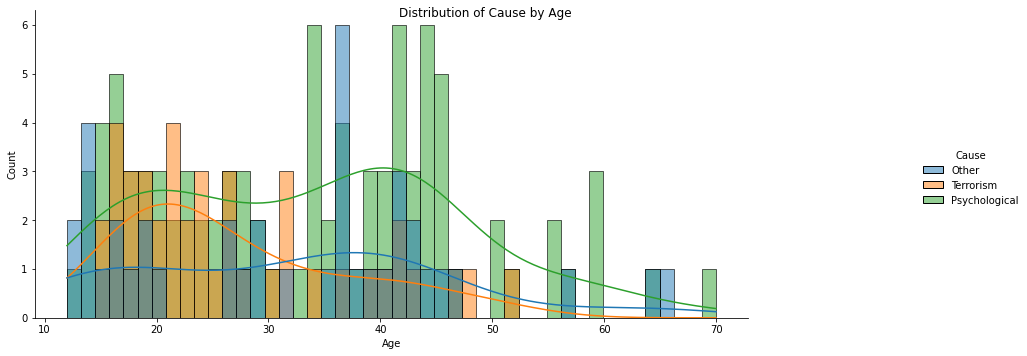

In [52]:
top_causes = data['Total victims'].groupby(data['Cause']).sum().sort_values(ascending=False).index.to_list()[:3]

age_area_dist = sns.displot(data=data[data['Cause'].isin(top_causes)], x='Age', bins=len(data['Age'].unique()), kde=True, hue='Cause');
age_area_dist.fig.suptitle('Distribution of Cause by Age');
age_area_dist.fig.set_size_inches(15,5)

Judging by the KDEs of the different causes, terrorism is a much more common cause in early adults than the rest of the ages. We can also see that the rest of the causes roughly follow the age's KDE with a tedency towards the age's midrange.

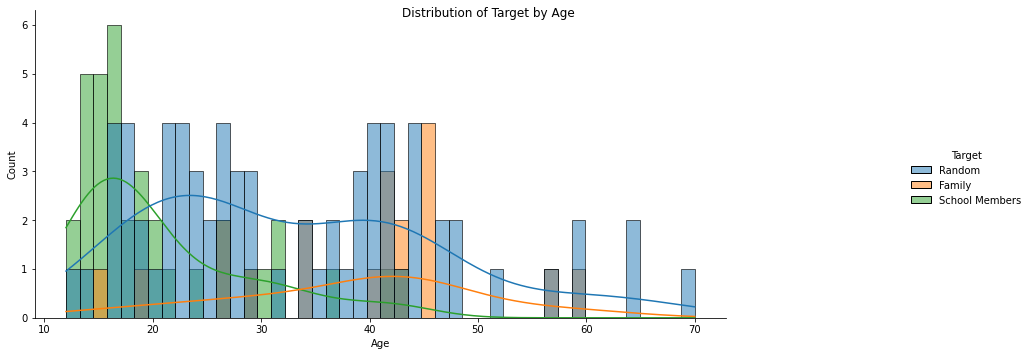

In [53]:
top_causes = data['Total victims'].groupby(data['Target']).sum().sort_values(ascending=False).index.to_list()[:3]

age_area_dist = sns.displot(data=data[data['Target'].isin(top_causes)], x='Age', bins=len(data['Age'].unique()), kde=True, hue='Target');
age_area_dist.fig.suptitle('Distribution of Target by Age');
age_area_dist.fig.set_size_inches(15,5)

As it was expected from the KDEs of the Incident Areas, teenagers and young adults target school members more often and random people are equally target in all ages. What is interesting though is the fact that family members are targets more often by people aged 30-40 despite the fact that shooting on residences were distributed in accordance to the age distribution. That might signify that a lot of the attacks in residences were not to a family member's residence but rather at a stranger's.

## Location

The final variable that we will analyze is the Location. We'll attempt to find if there are any underlying patterns about the location of the attacks and the see if there's correlation between the size of the attack.

In [54]:
fig = px.scatter_geo(data, fitbounds='locations', lat='Latitude', lon='Longitude', size='Total victims', size_max=50, opacity=0.8, hover_data=['Title', 'Location'])
fig.update_layout(title_text='US Mass Shooting Locations 1966-2017', title_x=0.5)
fig.show(renderer="colab")

# Size of circles are proportional to number of victims

The above graph helps us visualize and apprehend just how common mass shootings are through out the US and the size of the deadliest ones. We can observe on the map that the right part of US seems to have a lot more mass shootings than the left side. Comparing that to a population map of the US, it's apperent that these are the most populated areas:

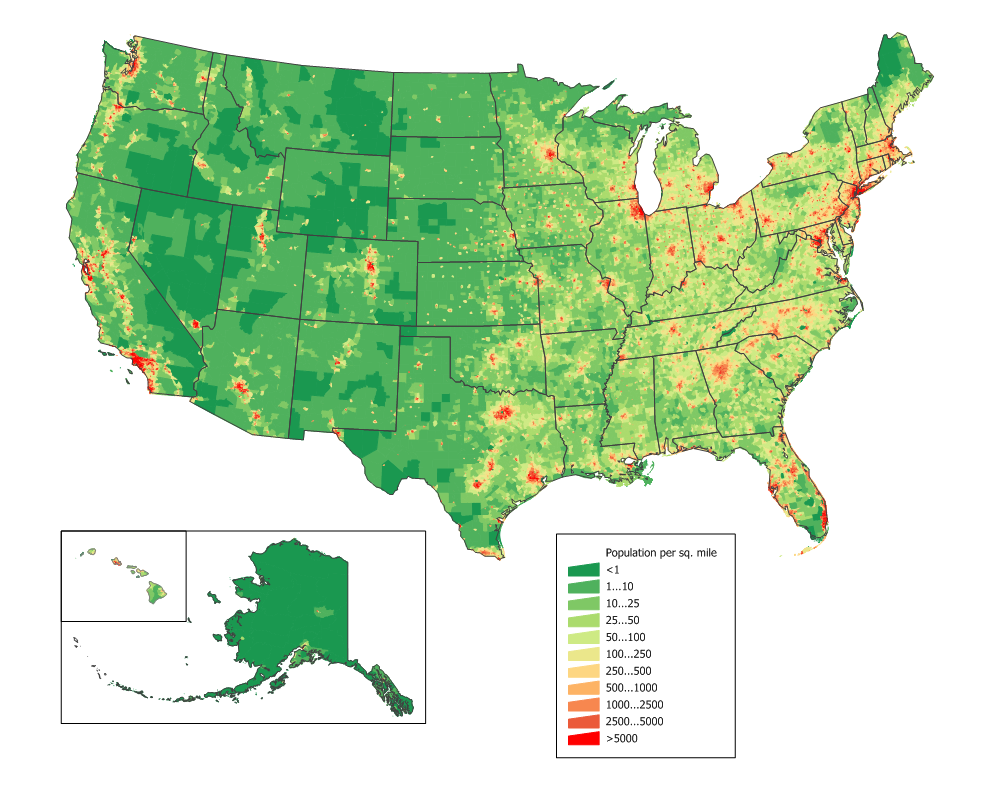

Let's see now which are the 10 US States with the most attacks:

The ten States with the most attacks:

CA    37
FL    25
TX    21
WA    17
GA    16
AZ    12
NC    11
NY    11
IL    11
AL    11
Name: States, dtype: int64


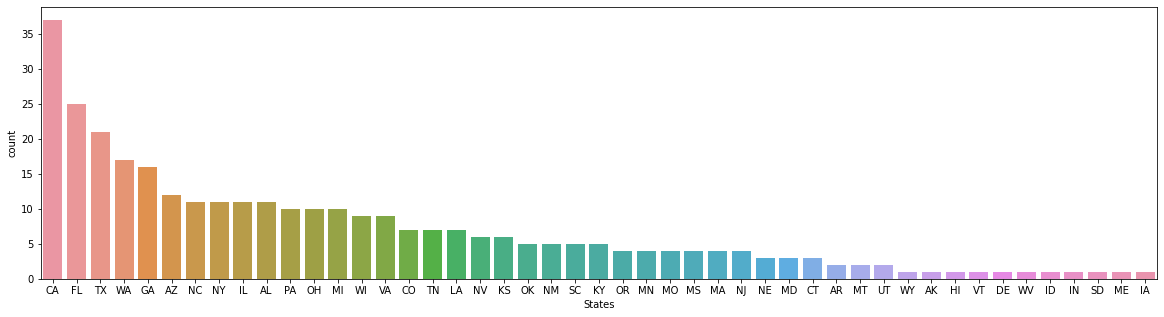

In [55]:
print('The ten States with the most attacks:\n') 
print(data['States'].value_counts()[:10])

fig = plt.figure(figsize=(20,5))

sns.countplot(data=data, x='States', order=data['States'].value_counts().index);

Finally, we will try to see if the nature of the attacks and the attackers change from State to State. We will compare the shooters median ages, total victims and target between different States.

In [56]:
# Create a new dictionary to store relative features grouped by US State
sample_per_state = data.groupby(['States'])['Age'].size()  # how many incidents per state
states_ages = data.groupby(['States'])['Age'].median()  # use median because of outliers
total_victims = data.groupby(['States'])['Total victims'].sum() 
target = data.groupby(['States'])['Target'].agg(lambda x:x.value_counts().index[0])

states_data_df = pd.DataFrame({'State':states_ages.index, 'Median Age':states_ages.values, 'Sample Size':sample_per_state.values, 'Total Victims': total_victims.values, 'Target': target.values})

Some states have too little incidents for the median age and the most common targets to be valuable info. Because of that will only use States that have 5 or more attacks.

In [57]:
states_data_df = states_data_df[states_data_df['Sample Size'] >= 5]

Graph a multi-dimentional scatter plot to visualize any possible differences between the states. The size of the circles is the total number of victims in the State, the color is the target category.

In [58]:
fig = px.scatter(states_data_df, x="State", y="Median Age", size="Total Victims", color='Target', hover_data=['Sample Size'], size_max=20)
fig.update_layout(title_text='Shooter Age, Targets and Number of Victims in different States', title_x=0.5)
fig.show()

Interpretting the above graph, there are a few notable differences we can notice. First of all the age of the shooter seems to flunctuate a lot depending on the State, with Kansas having the smaller median age with a value of just 14 years old while Florida and Virginia having the biggest median age with a value of 42. The targets of the shooters are in most States random people, however in Georgia, New Mexico and Oklahoma the most common target is Family, in Ohio and South Carolina the most common is School Members and in Kentucky it's Coworkers.

# Summaries

We will complete this analysis by taking a look at the "Summaries" feature of the dataset. The most common words in this column will be detected and visualized. Maybe there are usefull observations we can make that were not visible from the rest of the features.

In [59]:
from collections import Counter
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))  # Create a set of stopwords

word_tokenizer = RegexpTokenizer(r'\w+')  # Delete special characters
word_tokens = word_tokenizer.tokenize(str(data['Summary'].to_list()))

filtered_words = [w for w in word_tokens if not w.lower() in stop_words] # Remove stopwords

most_common = Counter(filtered_words).most_common(50)  # Get 50 most common words
most_common = pd.DataFrame(most_common, columns=['Word', 'Frequency'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [60]:
most_common

,Word,Frequency
0,shot,174
1,killed,168
2,year,154
3,old,153
4,two,146
5,shooting,112
6,people,107
7,shooter,105
8,man,104
9,killing,94


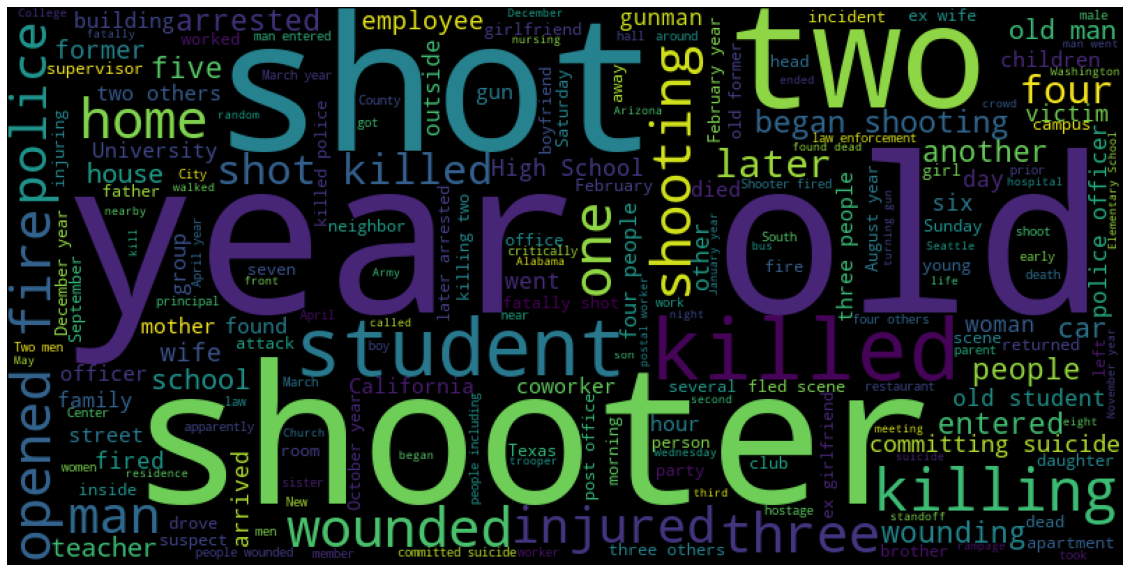

In [61]:
from wordcloud import WordCloud, STOPWORDS

# Create the graph
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(str(data['Summary'].to_list()))

plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the table of most frequent words we can see that the word arrested is mentioned 52 times and the word suicide 50 times. The fact that these words are so common shows that a lot of the shooters, of whom the identity is know, either commit suicide or get arrested after the incident. That might be a solid foundation to create a new feature about what happened to the shooter after the incident. A new categorical variable could be made with categories like "Suicide", "Arrest", "Unkown" but we'll not go forward to implement that idea in this analysis. 

Another thing that stands out is that the year 2015 is mentioned 42 times and the month February is mentioned 28 times. That signifies that this year and month have some sort of meaningfull relationship with the shootings. From the graph of total victims per year we have created early on in this analysis, 2015 was the year with the most fatalities. We don't have any information about the months so let's make two graphs to investigate: one graph of the months and the total victims and one of months and number of attacks.

In [62]:
x = data['Date'].dt.month.unique()  # Year of incident

total_victims = data['Total victims'].groupby(data['Date'].dt.month).sum().iloc[::-1]
fatalities = data['Fatalities'].groupby(data['Date'].dt.month).sum().iloc[::-1]
injured = data['Injured'].groupby(data['Date'].dt.month).sum().iloc[::-1]

y = [total_victims, fatalities, injured]

fig = px.bar(data, x=x, y=y)
fig.data[0].name = "Total"
fig.data[1].name = "Killed"
fig.data[2].name = "Injured"
fig.update_layout(title_text='Total Victims per Month', title_x=0.5, xaxis_title="Year", yaxis_title="Victims")
fig.show(renderer="colab")

In [63]:
data['Date'].dt.month.value_counts()

fig = px.bar(x=data['Date'].dt.month.value_counts().index, y=data['Date'].dt.month.value_counts());
fig.update_layout(title_text='Number of Shootings per Month', title_x=0.5, xaxis_title="Month", yaxis_title="Count")
fig.show(renderer="colab")

Even though February doesn't seem to be the month with the most victims, the second graph shows that it's the month with the most shootings in the dataset.

# Conclusion

As with all Exploratory Data Analysis, the main goals of this EDA was to examine and understand the dataset better in such a way that we can gain the most out of a large number of data. We analyzed the types of variables of the dataset, we determined the range and the outliers of them, we explored missing values and we attempted to fill them in whenever that was possible, we found underlying patterns and relationships between the features, we made hypothesis and tried to confirm or reject them and most importantly we gain a better insight into the data we're dealing with and its constraints.

One of the very first things that was revealed from the data exploration was that not only the dataset was small but it also contained quite a lot null values in various features. Using feature engineering, we managed to fill in all the null values in the columns "Location", "Latitude" and "Longitude" but we didn't manage to fill in almost any values for the column "Age". That is a very serious constraint of the dataset as later on in the analysis we also realized that this particular feature affects multiple others. The fact that that it has NaN value for almost half of the instances, makes it hard to use imputation to fill in the missing values and as such collecting more data for that feature is suggested.

Another thing that came up from this analysis was the fact that the features "Total victims", "Injured" and "Fatalities" have a lot of outliers and as matter of fact there was one extreme outlier, being almost 6 times more than the next bigger and about 120 times greater than the interquantile range. Due to the small size of the dataset removing the outliers is not preferred. However, it might be usefull to drop the one extreme outlier and using imputation to alter the rest. The features "Total victims", "Injured" and injured are also almost totally correlated so we should also keep that in mind at the feature selection process.

After analyzing the feature "Age", it was revealed that it is a significant factor that affects the Incident Area, the Tagets and Cause of the attack. Location on the other hand didn't seem to have any strong correlation with any of those features with the exception of a few States.

Finally, from our dataset we also derived a lot of information about the US mass shooting problem. I think it is important to reflect on that in the way it was depicted in the dataset. Overally, both the number of shootings and the number of victims greatly increases with the years. The fact that almost 11% of the shooters are underage along with the fact that the vast majority -almost exclusively- are men, is alarming and is giving dire warnings about the attention given to mental health issues as well as about the "health" of the modern American society.